# 1. Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 2. Load MNIST dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 3. Preprocess data

In [5]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# 4. Build CNN model

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 5. Compile the model

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train the model

In [8]:
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test)) 

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.9570 - loss: 0.1452 - val_accuracy: 0.9788 - val_loss: 0.0634
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9844 - loss: 0.0498 - val_accuracy: 0.9865 - val_loss: 0.0388
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9895 - loss: 0.0345 - val_accuracy: 0.9890 - val_loss: 0.0307


# 7. Test accuracy

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9890 - loss: 0.0307
Test Accuracy: 0.99


# 8. Pick a random test image and predict

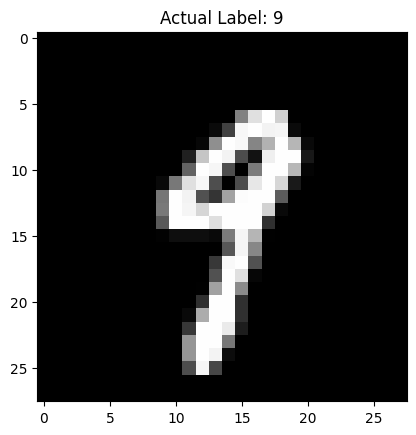

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Predicted Label: 9


In [11]:
index = np.random.randint(0, len(x_test))
image = x_test[index]
plt.imshow(image.reshape(28,28), cmap='gray')
plt.title(f"Actual Label: {np.argmax(y_test[index])}")
plt.show()

prediction = model.predict(image.reshape(1,28,28,1))
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")